# Getting started - a single particle

In this tutorial, we'll simulate the stochastic dynamics of a single nanoparticle. We model clusters of nanoparticles using the `magpy.Model` class. In this case we only have a single particle in our cluster. The first step is to import magpy.

In [1]:
import magpy as mp

To create our model, we need to specify the geometry and material properties of the system. The units and purpose of each property is defined below.

| Name | Description | Units |
|------|-------------|-------|
| Radius | The radius of the spherical particle | m |
| Anisotropy | Magnitude of the anisotropy | J/m$^3$ |
| Anisotropy axis | Unit vector indicating the direction of the anisotropy | - |
| Magnetisation | Saturation magnetisation of every particle in the cluster | A/m |
| Magnetisation direction | Unit vector indicating the initial direction of the magnetisation | - |
| Location | Location of the particle within the cluster | m |
| Damping | The damping constant of every particle in the cluster | - |
| Temperature | The ambient temperature of the cluster (fixed) | K |

**Note:** radius, anisotropy, anisotropy_axis, magnetisation_direction, and location vary for each particle and must be specified as a list.

In [2]:
single_particle = mp.Model(
    radius = [12e-9],
    anisotropy = [4e4],
    anisotropy_axis = [[0., 0., 1.]],
    magnetisation_direction = [[1., 0., 0.]],
    location = [[0., 0., 0.]],
    damping = 0.1,
    temperature = 300.,
    magnetisation = 400e3
)

### Simulate

A simulation in magpy consists of simulating the magnetisation vector of the particle in time. In the model above we specified the initial magnetisation vector along the $x$-axis and the anisotropy along the $z$-axis. Since it is energetically favourable for the magnetisation to align with its anisotropy axis, we should expect the magnetisation to move toward the $z$-axis. With some random fluctuations.

The `simulate` function is called with the following parameters:
 - `end_time` the length of the simulation in seconds
 - `time_step` the time step of the integrator in seconds
 - `max_samples` in order to save memory, the output is down/upsampled as required. So if you simulate a billion steps, you can only save the state at 1000 regularly spaced intervals.
 - `seed` for reproducible simulations you should always choose the seed.

In [3]:
results = single_particle.simulate(
    end_time = 5e-9,
    time_step = 1e-14,
    max_samples=1000,
    seed = 1001
)

The `x`,`y`,`z` components of the magnetisation can be visualised with the `.plot()` function.

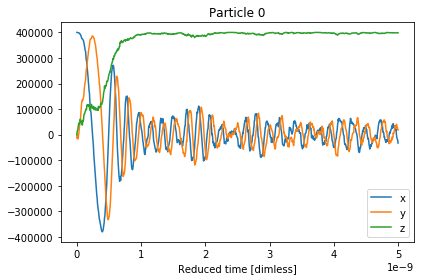

In [4]:
results.plot()

We can also access this data directly and plot it however we like! In this example, we normalise the magnetisation and plot it in 3d space.

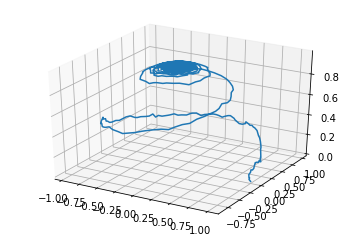

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Ms = 400e3
time = results.time
mx = results.x[0] / Ms # particle 0
my = results.y[0] / Ms # particle 0
mz = results.z[0] / Ms # particle 0

fg = plt.figure()
ax = fg.add_subplot(111, projection='3d')
ax.plot3D(mx, my, mz)